<https://github.com/mxabierto/calidad-del-aire/blob/master/notebooks/3_EDA_2.ipynb>

In [2]:
# Vamos a utilizar estas librerías
import pandas as pd

# Load data

In [8]:
# Load estaciones
estaciones = pd.read_csv('data_csv/estaciones_sinaica.csv')
print('Shape of estaciones DataFrame (rows, columns): ' + str(estaciones.shape))
estaciones.head()

Shape of estaciones DataFrame (rows, columns): (185, 7)


,_id,lat,long,id,nombre,codigo,redesid
0,5cccf5bee2705c1932820580,21.873311,-102.320803,31,CBTIS,CBT,30
1,5cccf5bee2705c1932820581,21.846392,-102.288431,32,Secretaría de Medio Ambiente,SMA,30
2,5cccf5bee2705c1932820582,21.883781,-102.295825,33,Centro,CEN,30
3,5cccf5bee2705c1932820583,32.639722,-115.506389,39,COBACH,SPABC14,32
4,5cccf5bee2705c1932820584,32.603639,-115.485944,41,CESPM,SPABC19,32


In [14]:
# Load mediciones
# Mediciones de la estacion Merced, del parametro Ozono (O3)
mediciones = pd.read_csv('data_csv/merced_o3_master.csv')
mediciones['fecha'] = pd.to_datetime(mediciones['fecha'])
mediciones.info()       # cast your eye to verify that 'fecha' is now a datetime 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10573 entries, 0 to 10572
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   validoorig    10573 non-null  int64         
 1   city          10573 non-null  object        
 2   state         10573 non-null  object        
 3   valororig     10573 non-null  float64       
 4   parametro     10573 non-null  object        
 5   estacionesid  10573 non-null  int64         
 6   hora          10573 non-null  int64         
 7   fecha         10573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 660.9+ KB


In [13]:
# show first 5 records
print('Shape of mediciones DataFrame (rows, columns): ' + str(mediciones.shape))
mediciones.head()

Shape of mediciones DataFrame (rows, columns): (10573, 8)


,validoorig,city,state,valororig,parametro,estacionesid,hora,fecha
0,1,Valle de México,Ciudad de México,0.007,O3,256,9,2018-08-10
1,1,Valle de México,Ciudad de México,0.016,O3,256,10,2018-08-10
2,1,Valle de México,Ciudad de México,0.024,O3,256,11,2018-08-10
3,1,Valle de México,Ciudad de México,0.039,O3,256,12,2018-08-10
4,1,Valle de México,Ciudad de México,0.060,O3,256,13,2018-08-10


# EDA

In [15]:
# explorar mediciones de Ozono
mediciones[mediciones.parametro=='O3'].valororig.describe()

count    10573.000000
mean         0.027209
std          0.028023
min          0.001000
25%          0.004000
50%          0.016000
75%          0.043000
max          0.159000
Name: valororig, dtype: float64

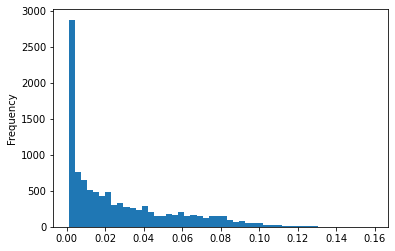

In [17]:
ozono = mediciones[mediciones.parametro=='O3']
ozono = ozono[ozono.valororig.between(0, 1)]
ozono.valororig.plot.hist(bins=50)

In [22]:
ozono.info()        # cast your eye to verify that 'fecha' is now a datetime 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10573 entries, 0 to 10572
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   validoorig    10573 non-null  int64         
 1   city          10573 non-null  object        
 2   state         10573 non-null  object        
 3   valororig     10573 non-null  float64       
 4   parametro     10573 non-null  object        
 5   estacionesid  10573 non-null  int64         
 6   hora          10573 non-null  int64         
 7   fecha         10573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.0+ MB


In [18]:
# Me parece raro encontrar valores más grandes de ozono que lo que se tiene en la CDMX
ozono[ozono.city=='Valle de México'].describe()

,validoorig,valororig,estacionesid,hora
count,10573.0,10573.000000,10573.0,10573.000000
mean,1.0,0.027209,256.0,12.314386
std,0.0,0.028023,0.0,6.574186
min,1.0,0.001000,256.0,0.000000
25%,1.0,0.004000,256.0,7.000000
50%,1.0,0.016000,256.0,12.000000
75%,1.0,0.043000,256.0,18.000000
max,1.0,0.159000,256.0,23.000000


In [19]:
# Estas estaciones están raras, puede que estén mal calibradas
ozono[ozono.valororig>0.2].estacionesid.value_counts()

Series([], Name: estacionesid, dtype: int64)

In [20]:
ozono.sort_values('valororig', ascending=False).head(15)

,validoorig,city,state,valororig,parametro,estacionesid,hora,fecha
5492,1,Valle de México,Ciudad de México,0.159,O3,256,16,2018-05-04
5491,1,Valle de México,Ciudad de México,0.151,O3,256,15,2018-05-04
4170,1,Valle de México,Ciudad de México,0.132,O3,256,17,2018-02-28
5640,1,Valle de México,Ciudad de México,0.130,O3,256,16,2018-05-11
6201,1,Valle de México,Ciudad de México,0.128,O3,256,15,2018-06-07
2187,1,Valle de México,Ciudad de México,0.128,O3,256,17,2018-11-23
2186,1,Valle de México,Ciudad de México,0.128,O3,256,16,2018-11-23
9686,1,Valle de México,Ciudad de México,0.128,O3,256,16,2018-11-23
9687,1,Valle de México,Ciudad de México,0.128,O3,256,17,2018-11-23
4041,1,Valle de México,Ciudad de México,0.127,O3,256,17,2018-02-21


In [21]:
# Estación en Merced
aux = ozono[ozono.estacionesid==256]
aux['fecha_hora']  = pd.to_datetime(aux.fecha + ' ' +
                                    aux.hora.astype(str) +':00:00')
aux.sort_values('fecha_hora', inplace=True)

aux.plot('fecha_hora', 'valororig', legend=False)

TypeError: unsupported operand type(s) for +: 'DatetimeArray' and 'str'